# 1. Estudo das Equações Diferenciais Ordinárias (EDOs) de 1ª ordem

## 1.1 Introdução

As equações diferenciais são relações entre uma função e suas derivadas e são usadas para modelar sistemas em todos os campos da engenharia e da ciência. Por exemplo, uma equação diferencial simples relaciona a aceleração de um carro com sua posição. Em geral, encontrar soluções exatas para equações diferenciais pode ser uma tarefa difícil ou até mesmo impossível. Portanto, soluções numéricas são alternativas para tornar essas equações úteis em projetos e estudo de fenômenos da natureza.

Por exemplo, considere um pêndulo de comprimento $l$, com massa $m$ em sua extremidade, como ilustrado na figura abaixo. 

<img src="imagens/pendulo.png" width="100"/>

O ângulo que o pêndulo faz com o eixo vertical ao longo do tempo, $\theta (t)$ na presença de gravidade vertical $g$ pode ser descrito pela equação do pêndulo, que é a EDO

$$
ml\frac{d^2\theta(t)}{dt^2} = -mg \, sen(\theta(t)).
$$

Esta equação pode ser deduzida somando as forças nas direções $x$
e $y$ e, em seguida, mudando para coordenadas polares.

Essa é uma equação não linear de difícil solução mas pode ser simplificada assumindo que os ângulos são muito pequenos (ou seja, $sen(\theta(t) \approx \theta(t)$, então a equação do pêndulo se reduz a

$$
l\frac{d^2\theta(t)}{dt^2} = -g\theta(t).
$$

e a solução geral $\theta(t) = \cos\left(\sqrt{\frac{g}{l}}t\right)$ pode ser obtida. Para um ângulo inicial $\theta_0$, partindo do repouso no instante $t=0$, obtém-se a solução particular 

$$\theta(t) = \theta_0\cos\left(\sqrt{\frac{g}{l}}t\right)$$

Para verificar, basta calcular as derivadas de 1ª e 2ª ordens e substituir na equação.

Infelizmente, não existe uma solução explícita para a equação do pêndulo com grandes ângulos que seja tão simples algebricamente. Uma vez que este sistema é muito mais simples do que a maioria dos sistemas práticos de engenharia e não tem solução analítica óbvia, a necessidade de soluções numéricas para EDOs é clara.

As equações diferenciais são bastante comuns em engenharia, física e matemática, portanto seu estudo é um campo vasto e rico. Este capítulo cobre equações diferenciais ordinárias com valores iniciais especificados, uma subclasse de problemas de equações diferenciais chamados problemas de valor inicial. Para esses casos, o Python possui um conjunto completo de funções para resolver esse tipo de problema. Neste capítulo vamos estudar equações diferenciais ordinárias e alguns métodos de resolução com Python.




## 1.2 O que são EDOs?

Uma equação diferencial ordinária (EDO) é uma equação que relaciona uma função de uma variável, $y(x)$ e suas derivadas, sendo $x$ a variável independente e $y(x)$ a função incógnita.

A ordem de uma equação diferencial é determinada pela mais alta ordem da derivada da função $y(x)$ presente na equação. As equações a seguir são exemplos de equações diferenciais ordinárias. Temos as seguintes notações usuais:

$$y'= \frac{dy}{dx}, \,\,\,  y''= \frac{d^2y}{dx^2}, \,\,\,... $$

Por exemplo:

$ \frac{dy}{dx} = 3x-1$ é uma EDO de ordem 1

$ y' = -xy$ é uma EDO de ordem 1

$ \frac{d^2y}{dx^2} = x^2-y+e^x$ é uma EDO de ordem 2 

$ y'' -4y' + 3y = x$ é uma EDO de ordem 2 

$ \frac{d^5y}{dx^5} + 3x\frac{dy}{dx}=2$ é uma EDO de ordem 5 

Resolver uma equação diferencial consiste em determinar uma função 𝑦(𝑥) que satisfaça a equação.

A seguir vamos ver alguns exemplos usando a biblioteca SymPy para computar algumas expressões. Para isso preciamos importar a biblioteca executando as duas linhas de código mostradas abaixo.

In [1]:
import sympy as sym
sym.init_printing()

**Exemplo 1.1:** Vamos verificar se $\theta(t) = \cos\left(\sqrt{\frac{g}{l}}t\right)$ é solução da equação do pêndulo 

$$
l\frac{d^2\theta(t)}{dt^2} = -g\theta(t)
$$



In [2]:
t,g,l = sym.symbols('t,g,l')     #variáveis simbólicas
theta = sym.Function('theta')(t) #função simbolica
theta_func = sym.cos(sym.sqrt(g/l)*t) #função

In [3]:
# theta_func.diff(t) -> derivada primeira
expr = sym.Eq(theta.diff(t), theta_func.diff(t))
expr

                ___    ⎛      ___⎞
d              ╱ g     ⎜     ╱ g ⎟
──(θ(t)) = -  ╱  ─ ⋅sin⎜t⋅  ╱  ─ ⎟
dt          ╲╱   l     ⎝  ╲╱   l ⎠

In [4]:
# theta_func.diff(t.t) -> derivada segunda
expr2 = sym.Eq(theta.diff(t,t), theta_func.diff(t,t))
expr2 

                  ⎛      ___⎞ 
                  ⎜     ╱ g ⎟ 
  2         -g⋅cos⎜t⋅  ╱  ─ ⎟ 
 d                ⎝  ╲╱   l ⎠ 
───(θ(t)) = ──────────────────
  2                 l         
dt                            

Assim, temos

$$\frac{d\theta(t)}{dt} = -\sqrt{\frac{g}{l} }\sin\left(\sqrt{\frac{g}{l}}t\right)$$ 

e  

$$\frac{d^2\theta(t)}{dt^2} = -\frac{g}{l}\cos\left(\sqrt{\frac{g}{l}}t\right)$$

Substituindo é possível verificar que a equação é satisfeita.

**Exemplo 1.2:** A equação diferencial $y' = -x y$ tem solução $ y = c \, e^{\frac{-x^2}{2}}$ com $c$ constante, pois 

$$ y' = c \, e^{\frac{-x^2}{2}}(-x) = -xy$$

ou seja, a função $y(x)$ satisfaz a equação. Veja um exemplo de como obter a solução com `sympy`.
 

In [9]:
# Define os simbolos e funções
x = sym.symbols('x')
y = sym.Function('y')
dy = sym.Derivative(y(x),x)

# Define a equação e resolve
eq = sym.Eq(dy, -x*y(x))
sym.dsolve(eq)

             2 
           -x  
           ────
            2  
y(x) = C₁⋅ℯ    

Podemos observar que esta equação apresenta infinitas soluções, pois, para cada valor diferente de $C_1$ temos uma solução diferente. 

Para visualizar o gráfico de diferentes soluções, fazendo variar a constante $C_1$, vamos usar os códigos mostrados a seguir. Primeiramente importamos as biblioteca NumPy e Matplotlib com as duas linhas de códigos mostrdas a seguir.

In [11]:
import numpy as np
import matplotlib.pyplot as plt

Uma vez que essas duas bibliotecas foram importadas não precisamos importar novamente para usar.

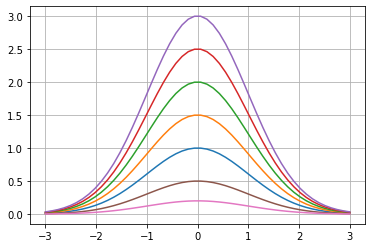

In [16]:
# Definindo uma função usando a sentaxe "lambda" 
y = lambda x: np.exp((-x**2)/2) 
# Definindo um intervalo de X para o plot
X = np.linspace(-3,3)

# Plotando para diversos valores se C1: 1, 1.5, 2, 2.5, ...
plt.plot(X,1*y(X),     
         X,1.5*y(X), 
         X,2*y(X), 
         X,2.5*y(X), 
         X,3*y(X), 
         X,0.5*y(X),
         X,0.2*y(X))
plt.grid()
plt.show()

**Exemplo 11.3:** A equação diferencial $\frac{du}{dt} = t + 2$ tem solução obtida facilmente integrando ambos os lados da equação fazendo

$$ \int \frac{du}{dt}  = \int (t+2)dt $$

$$ u(t) = \frac{t^2}{2}+2t+k$$

em que $k$ é a constante de integração. Nesse caso a família de soluções, para $k=\{-1,0,1,5,10,15, 20\}$ pode ser visualizada como é mostrado abaixo.a

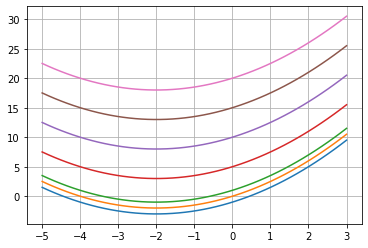

In [17]:
# Modificano o código anterior para esse novo exemplo
u = lambda t: (t**2/2)+2*t
t = np.linspace(-5,3)
plt.plot(t,u(t)-1, 
         t,u(t)-0, 
         t,u(t)+1,
         t,u(t)+5, 
         t,u(t)+10,
         t,u(t)+15,
         t,u(t)+20,)
plt.grid()
plt.show()

Se impomos uma condição, como por exemplo $u(0)= 8$, obtemos o valor $k=8$, que restringe a solução a uma única curva e não mais à uma família de curvas. Uma equação diferencial com condições iniciais como essa compõem o que chamamos de um *problema de valor inicial* (PVI).

Ou seja, o problema de valor inicial descrito acima pode ser enunciado como

$$ 
\begin{cases} 
\frac {du}{dt}= t+2\\ 
\\
u(0)=8
\end{cases}$$

Usando a biblioteca `scipy` podemos obter uma solução numérica para um problema como esse usando a função `solve_ivp`, como é mostrado no código abaixo. Para isso, vamos primeiramente importar a função do módulo `integrate` usando a linha mostrada a seguir.

In [44]:
from scipy.integrate import solve_ivp

Agora o código para solucionar o PVI.

In [45]:
# Definindo a função usando 'def'
def du(t, u): 
    return t+2  

# Dados do problema
t0 = 0.0
tf = 5.0
u0 = [8]
# Discretização do intervalo em 20 pontos
ti = np.linspace(t0,tf,20)

# Obtendo a solução
sol = solve_ivp(du, (t0,tf), u0, t_eval=ti)
np.round(sol.y,4) 

array([[ 8.    ,  8.5609,  9.1911,  9.8906, 10.6593, 11.4972, 12.4044,
        13.3809, 14.4266, 15.5416, 16.7258, 17.9792, 19.3019, 20.6939,
        22.1551, 23.6856, 25.2853, 26.9543, 28.6925, 30.5   ]])

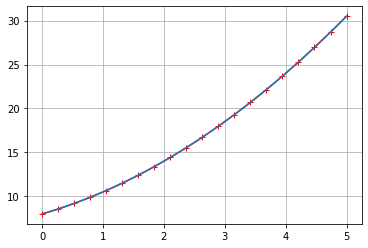

In [46]:
# Plotando a solução numérica e analítica
plt.plot(ti, sol.y[0],'r+-', ti, u(ti)+u0[0])
plt.grid()
plt.show()

O método usado por padrão na função `solve_ivp` é o `RK45`, ou seja,  o método Runge-Kutta explícito de ordem 5(4). O erro é controlado assumindo a precisão do método de quarta ordem, mas os passos são executadas usando a fórmula precisa de quinta ordem. Mais informações sobre outros métodos disponíveis e sua descrição podem ser acessadas em: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html

E existência e unicidade da solução de um PVI é garantida, sob certas condições, pelos teoremas *Condição de Lipschits*, *Pincard-Lindelof* e *Dependência contínua na condição inicial* enunciados e demonstrados em Medeiros e Oliveira (2020, p.24) http://www.mat.ufpb.br/milton/disciplinas/edo/livro_edo.pdf)

## 1.3 Métodos para EDOs lineares de 1ª ordem 

Alguns métodos analíticos para resolução de EDOs são os métodos usando fator integrante, método das variáveis separáveis e método para equações exatas.

Para utilizar o método do **fator integrante**, a EDO deve se apresentar da seguinte forma:
$$y'+p(t)y=g(t)$$

O método consiste em multiplicar ambos os lados da equação por $\mu(t)=e^{\int p(t)dt}$ e integrar, então chega-se à solução geral
$$y(t)=\frac{\int \mu(t)g(t)dt+c}{\mu(t)}.$$

Uma solução particular pode ser obtida calculando o valor da constante $c$ a partir de um valor inicial $y(t_0)=y_0$ dado.

**Exemplo 1.4:** Dada a equação $y'-y=2te^{2t}$, encontre a solução particular sabendo que $y(0)=1$. 

_Solução:_ Multiplicando ambos os lados da equação por $\mu(t)=e^{\int -1 dt}= e^{-t}$ obtém-se

$$y'e^{-t}-ye^{-t}=2te^{2t}e^{-t}$$
ou

$$\frac{d}{dt}\left[ye^{-t} \right]=2te^t$$

Integrando ambos os lados obtemos $ye^{-t}=\int 2te^t dt$ que, integrando por partes, resulta em 

$$y = 2te^{2t}-2e^{2t}+c$$

Como $y(0)=1$, então $c=3$. Logo a solução particular é 

$$y = 2te^{2t}-2e^{2t}+3$$

Comferindo com SymPy:

In [47]:
# Define os simbolos e funções
t = sym.symbols('t')
y = sym.Function('y')
dy = sym.Derivative(y(t),t)

# Define a equação e resolve
eq = sym.Eq(dy-y(t), 2*t*sym.exp(2*t))
sym.dsolve(eq)

       ⎛                t⎞  t
y(t) = ⎝C₁ + 2⋅(t - 1)⋅ℯ ⎠⋅ℯ 

Plotando essa função no intervalo de 0 a 1:

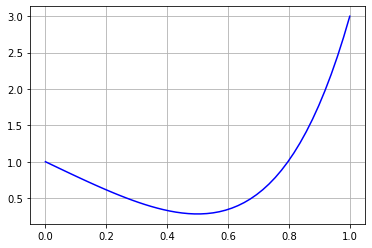

In [48]:
t = np.linspace(0,1)
y = 2*t*np.exp(2*t) - 2*np.exp(2*t)+3
plt.plot(t,y,'b')
plt.grid()
plt.show()

**Exemplo 1.5:** Resolvendo a equação $y' + y = \cos(t)$ usando o fator integrante obtém-se $y(t) = c e^{-t} + \frac{\cos(t) + \sin(t)}{2}$ em que $c$ é determinada pela condição inicial $y(0) = c+1/2$. Vamos plotar as soluções de $y(t)$ no intervalo $0 \leq t \leq 10$ para os valores iniciais $y(0)=-3,-2,-1,0,1,2,3$.

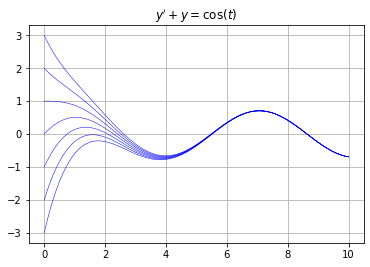

In [49]:
t = np.linspace(0,10,100)
for y0 in range(-3,4):
    c = y0 - 1/2
    y = c*np.exp(-t) + (np.cos(t) + np.sin(t))/2
    plt.plot(t,y,'b', lw = 0.5)
plt.title("$y' + y = \cos(t)$"), plt.grid(True)
plt.show()

Nos exemplos acima, conseguimos encontrar a solução geral da equação diferencial de primeira ordem e plotar a solução para diferentes valores iniciais. No entanto, a maioria das equações diferenciais não pode ser resolvida explicitamente com funções elementares. Para esses casos sempre podemos aproximar soluções com métodos numéricos e métodos gráficos.

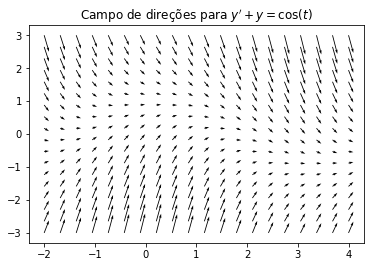

In [50]:
t = np.linspace(-2,4, 20)
y = np.linspace(-3, 3, 18)

tm, ym = np.meshgrid(t, y)

dy = np.cos(tm)-ym
dt = np.ones(dy.shape)

plt.title("Campo de direções para $y' + y = \cos(t)$")
plt.quiver(tm,ym,dt,dy,width=0.0025)
plt.show()

**Exercícios:**

(a) $y'+xy=x$

(b) $y'+6y=e^x$

(c) $y'+3x^2y=sen(x)e^{-x^3}$


Dizemos que uma EDO de 1ª ordem é de **variáveis separáveis** se puder ser escrita na forma

$$ y' = f(t) g(y)$$

nesse caso, escrevemos 

$$\frac{dy}{dt} = f(t) g(y)$$

ou 

$$\frac{1}{g(y)}dy = f(t)dt $$

e integramos o lado esquerdo em relação à $y$ e o lado direito em relação à $t$ para obter a solução, ou seja, fazemos

$$\int \frac{1}{g(y)}\,dy = \int f(x) \,dx + c $$

Vejamos um exemplo:

**Exemplo 1.6:** Seja a equação $y'=xy$, tem-se que $y=0$ é uma solução, para encontrar uma expressão para a solução geral, com $y \neq 0$ podemos usar o método de separação de variáveis fazendo

$$\int \frac{dy}{y} = \int x\,dx$$

$$\ln \, \lvert y\rvert = \frac{x^2}{2} + C$$

$$ \lvert y \rvert = e^{\frac{x^2}{2} + C} = e^{\frac{x^2}{2}} e^C = D e^{\frac{x^2}{2}}$$

Assim, para uma constante $D > 0$ a solução é
$$y = D e^{\frac{x^2}{2}}$$

Podemos usar `sympy` para onter as integrais

In [51]:
from sympy import *
init_printing(use_unicode=True)

x,y = symbols('x,y')
integrate(1/y, y)

log(y)

In [52]:
integrate(x, x)

 2
x 
──
2 

**Exemplo 1.6:** Vamos agora resolver $x^2y' = 1 - x^2+y^2 - x^2y^2$ com  $y(1) = 0$ fatorando o lado direito e separando as variáveis.

$$x^2y' = (1 - x^2)(1+y^2)$$

$$\frac{y'}{1+y^2} = \frac{1 - x^2}{x^2} $$

$$\frac{y'}{1+y^2}  = \frac{1}{x^2} - 1 $$

$$\arctan (y)  = \frac{-1}{x} - x + C $$

$$y = \tan \left(\frac{-1}{x} - x + C\right)$$

Aplicando a condição inicial chegamos a 

$$y = \tan \left(\frac{-1}{x} - x + 2 \right)$$

Usando `sympy` para obter as integrais:

In [37]:
integrate(1/(1+y**2), y)

atan(y)

In [38]:
integrate(1/(x**2) -1, x)

     1
-x - ─
     x

**Exercícios:** (ver mais em Boyce, 2020, p 26)

(a) $y'=\frac{x^2}{y}$ 

(b) $y'+y^2sen(x)=0$

(c) $y'=cos^2(x)cos^2(2y)$

(d) $xy'=(1-y^2)^{1/2}$


As equações **diferenciais exatas** são aquelas que podem ser colocadas na forma

$$M(x,y)+N(x,y)y'=0$$

em que  $M_y(x,y) = N_x(x,y)$. o que significa que existe uma função $\psi (x, y)$ tal que $\psi_x=M$ e $\psi_y=N$.




Suponha que possamos identificar uma função $\psi (x, y)$ tal que $\psi_x=M$ e $\psi_y=N$ e a função $y(x)$, diferenciável em $x$, é definida implicitamente por $\psi(x,y)=c$, então podemos escrever 

$$M(x,y)+N(x,y)y'= \frac{\partial \psi}{\partial y}+\frac{\partial \psi}{\partial y}\frac{dy}{dx}=\frac{d}{dx} \psi(x,y(x))$$

Então a equação diferencial a ser resolvida fica

$$\frac{d}{dx} \psi(x,y(x)) = 0$$


É possível obter uma expressão explícita para $\psi (x, y)$ integrando $\psi_x=M$  em relação a $x$, incluindo uma função arbitrária $h(y)$ em vez de uma constante arbitrária, depois diferenciaando o resultado em relação a $y$ e igualeando $N$. Então, usando esta última equação para resolver para $h(y)$. O próximo exemplo ilustra esse procedimento.



Vejamos um exemplo.

**Exemplo 1.7:** Vamos resolver a equação 

$$2x+y^2+2xyy'=0 \text.$$

Primeiramente notemos que para $\psi(x,y)=x^2+xy^2$ tmos que $\psi_x = 2x+y^2$ e $\psi_y=2xy$, então, a equação pode ser escrita como 

$$ \frac{\partial \psi}{\partial y}+\frac{\partial \psi}{\partial y}\frac{dy}{dx}=0$$

considerando que $y$ é função de $x$ e usando a regra da cadeia podemos escrever

$$ \frac{\partial \psi}{\partial x}(x,y)=\frac{d}{dx}(x^2+xy^2)=0$$

que integrando obtem-se a solução geral

$$ \psi(x,y)=x^2+xy^2=c \text.$$

ou

$$ y(x) = \pm \sqrt{\frac{c}{x}-x}$$


In [41]:
import sympy as sym
sym.init_printing(use_unicode=True)

t, l, x = sym.symbols('t lambda x')
y = sym.Function('y')(x)

expr = sym.Eq(2*x+y*y+2*x*y*y.diff(x),0)
expr

         d                 2       
2⋅x⋅y(x)⋅──(y(x)) + 2⋅x + y (x) = 0
         dx                        

In [42]:
sym.dsolve(expr)

⎡            ________             ________⎤
⎢           ╱ C₁                 ╱ C₁     ⎥
⎢y(x) = -  ╱  ── - x , y(x) =   ╱  ── - x ⎥
⎣        ╲╱   x               ╲╱   x      ⎦

**Exercícios:**
Para resolver uma simples equação diferencial de 1ª ordem, como por exemplo $y'+y=0$, $y=y(t)$, podemos proceder da seguinte maneira:


In [43]:
# definindo a variavel independente como símbolo
t = sym.symbols('t')

# definido uma função com classe Functiol
y = sym.Function('y')(t)

# definindo a equação em que y'=
eq = y.diff(t)+y

# resolvendo a equacao
sym.dsolve(eq, y)

           -t
y(t) = C₁⋅ℯ  

Algumas vezes, é possível converter uma equação diferencial que não é exata em uma exata multiplicando-se a equação por um **fator integrante** apropriado. 

Por exemplo, se $(M_y – N_x)/N$ for uma função só de $x$, então existirá um fator integrante $\mu$ que também só depende de $x$. Além disso, $\mu(x)$ pode ser encontrado resolvendo-se a equação linear e separável

$$\frac{d\mu}{dx} = \frac{M_y-N_x}{N}\mu $$

Um procedimento semelhante pode ser usado para determinar uma condição sob a qual a equação diferencial tenha um fator integrante que depende só de $y$.

**Ver exemplos p.51 e 52 do Boyce**

Use os passos acima para resolver as sequintes equações e teste a solução obtida.

(a) $y'=\frac{x^2}{y}$ 

(b) $y'+y^2sen(x)=0$

(c) $y'=cos^2(x)cos^2(2y)$

(d) $xy'=(1-y^2)^{1/2}$

(e) $y'+xy=x$

(f) $y'+6y=e^x$

(g) $y'+3x^2y=sen(x)e^{-x^3}$

## 1.4  Solução numérica de problema de valor Inicial (PVI)

Considere a equação diferencial ordinária, $y' = y$, cuja solução é dada por $y(x)=ce^x$ $c\in R$.

Assim, a equação diferencial dada apresenta infinitas soluções, uma vez que, para cada valor escolhido para a constante $c$, temos uma solução, como, por exemplo, $y(x)=c_0e^x$,$y(x)=c_1e^x$,$y(x)=c_2e^x$,sendo $c_0$, $c_1$ , $c_2$ valores fixados,conforme exibido na figura abaixo.


<img src="https://github.com/tiagoburiol/NUMETHODS/raw/master/8_SOLUCAO_NUMERICA_DE_EDOs/imagens/pvi01.png" width="560">

Se considerarmos que conhecemos o valor da função $y(x)$ em um ponto, isto é, $x = x_0$ , o valor de $y(x)$ é $y(x_0) = y_0$ e temos uma única solução para a equação proposta. Esta solução única é obtida quando usamos a solução geral da equação diferencial
no ponto $x = x_0$ e obtemos o valor da constante $c$, como segue: $$y(x_0)=y_0$$ 
então 
$$ce^{x_0} = y_0$$ 
logo 
$$c=y_0e^{0-x_0}$$

Assim, a solução única para a equação diferencial é dada por: 

$$y(x) = ce^x = y_0 e^{-x_0} e^x = y_0e^{(x-x_0)}$$

Portanto, $y(x) = y_0 e^{(x-x_0)}$, conforme exibido na figura.

**Definição:** Um Problema de Valor Inicial (PVI) de primeira ordem consiste de uma equação diferencial $y' = f (x,y)$, $x \geq x_0$ e uma condição inicial $y(x_0) = y_0$, em que $y_0$ é um valor dado, chamado de valor inicial.

Neste caso, podemos escrever o PVI da seguinte forma:

$$ 
\begin{cases} 
y'= f(x,y)\\ 
\\
y(x_0)=y_0
\end{cases}$$

Resolver o PVI consiste em determinar uma função $y(x)$ que satisfaça a equação diferencial $y' = f (x,y)$ e a condição inicial $y(x_0) = y_0$.

Se a função $f$ e $ \frac{\partial f}{\partial y}$ são contínuas, temos que o PVI apresenta solução única.



**Discretização:** Resolver numericamente um PVI consiste em calcular aproximações para $y = y(x)$ em pontos discretos $x_0,x_1,x_2,...,x_N$ de um intervalo $[a,b]$.

Para discretizar o intervalo $[a,b]$, tomamos $N$ subintervalos $(N \geq 1)$ e fazemos $x_n = x_0 + nh$, $n = 0,1,2,...,N$ com $x_0 =a$ e $x_N =b$,sendo $h = (x_N −x_0)/N$.

A este conjunto de pontos $x_0,x_1,x_2,...,x_N$ denominamos rede ou malha de pontos discretos, e calculamos aproximações para a função $y(x)$ nestes pontos, isto é, determinamos $y_n$ tal que $y_n \approx y(x_n)$, $n=0,1,...,N$.

A partir de um ponto inicial dado $y(x_0) = y_0$ (valor inicial), calculamos passo a passo, nos pontos 

$x_1 = x_0 +h$, 

$x_2 = x_0 +2h$, 

$x_3 = x_0 +3h$

,...,

$x_n = x_0 +nh$, 

soluções aproximadas $y_n$ para a solução exata $y(x_n)$, $n=0,1,2,...,N$, conforme ilustrado na figura a seguir.

<img src="https://github.com/tiagoburiol/NUMETHODS/raw/master/8_SOLUCAO_NUMERICA_DE_EDOs/imagens/discretizacao.png" width="560">

## 1.5 Método de Euler

Vamos agora estudar a solução de equações diferenciais ordinárias da forma

$$ \frac{dy}{dx} = f(x,y) $$

usando um método numérico de _passo único_ em que obtemos um processo iterativo para obter a solução para cada ponto $y_{i+1}$ a partir de um ponto $y_i$ conhecido. Fazemos isso considerando a derivada no ponto $x_i$ para obter o valor da função no ponto $x_{i+1}$ em que o tamanho de cada _passo_ é dado por $h = x_{i+1} - x_i$. Matemativamente, escrevemos

$$ y_{i+1} = y_i + \phi h$$

Assim, a estimativa da inclinação	é usada para extrapolar de um valor antigo $y_i$ para um valor novo $y_{i+1}$ em uma distância $h$. 


<img src="https://github.com/tiagoburiol/NUMETHODS/raw/master/8_SOLUCAO_NUMERICA_DE_EDOs/imagens/euler_fig01.png" width="400">

A inclinação no início do intervalo é tomada como uma aproximação da inclinação média em todo o intervalo, com isso um erro é inserido. Em geral, quanto maior o tamanho do passo, maior é o erro nessa apoximação.

<img src="https://github.com/tiagoburiol/NUMETHODS/raw/master/8_SOLUCAO_NUMERICA_DE_EDOs/imagens/euler_fig02.png" width="400">

No método de Euler a inclinação é tomada como sendo a derivada primeira da função $f(x,y)$, ou seja, considerando que $\frac{dy}{dx} = f(x,y)$, escrevemos

$$ y_{i+1} = y_i + f(x_i, y_{i}) h$$

Assim, a partir de um valor inicial $y_0$ conhecido obtemos estimativas para os valores subsequentes $y_1, y_2, y_3, ...$ da função.

Esse método também é chamado de método de _Euler-Cauchy_ ou _ponto-inclinação_.

**Exemplo 1.8:** Use o método de Euler para integrar numericamente a equação:

$$ \frac{dy}{dx} = -2x^3+12x^2-20x+8.5$$

de $x = 0$ a $x = 4$ com um tamanho de passo de $0.5$. A condição inicial em $x = 0$ é $y = 1$. 

A solução exata é dada por $y = -5.x^4+4x^3-10x^2+8.5x+1$.

_Solução:_ Com um passo $h=0.5$, temos $x_0 = 0.0$, $x_1 = 0.5$, $x_2 = 1.0$, $x_3 = 1.5$, ..., $x_8=4.0$. Assim, a partir da equação 

$$ y_{i+1} = y_i + f(x_i, y_{i}) h$$

com

$$f(x,y)= \frac{dy}{dx} = -2x^3+12x^2-20x+8.5$$

e sabendo que em $x_0 = 0$ temos $y_0 = 1$ obtemos os valores de $y_1, y_2, y_3, ..., y_8$ 

Vamos fazer isso computacionalmente, em Python.

pontos xi: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4. ]
pontos yi: [1.0, 5.25, 5.875, 5.125, 4.5, 4.75, 5.875, 7.125, 7.0]


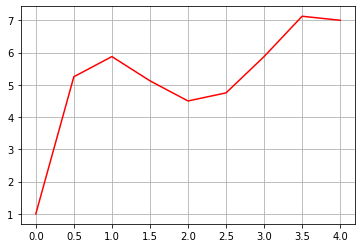

In [70]:
import numpy as np
import matplotlib.pyplot as plt

h = 0.5 #passo
x0 = 0.0
xn = 4.0

# criamos a lista com os pontos xi
X = np.arange(x0, xn+h, h) 
print ("pontos xi:", X)

# lista com y0, a ser preenchida pelos yi
Y = [1.0]                  

# entramos com f(x,y)
f = lambda x: -2*x**3 + 12*x**2 - 20*x + 8.5

# laço para ir calculando os yi e preenchendo a lista
for x in X[0:-1]:
    Y.append(Y[-1] + f(x)*h ) #Y[-1] é o último yi calculado
    
# imprime
print ("pontos yi:", Y)

# plota
plt.plot(X, Y, "r-")
plt.grid()
plt.show()

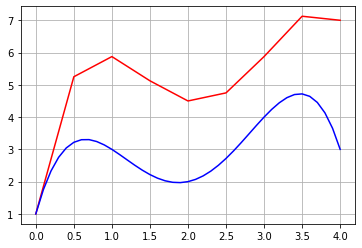

In [71]:
# plotando a solução exata para comparar
Xex = np.arange(0, 4.1, 0.1)
Yex = []
sol_ex = lambda x: -0.5*x**4 + 4*x**3 - 10*x**2 + 8.5*x + 1.0

for x in Xex:
    Yex.append(sol_ex(x))

plt.plot(X, Y, "r-", Xex, Yex, "b-")
plt.grid()
plt.show()

Nesse exemplo usamos um polinômio simples para a equação diferencial para facilitar a análise de erro a seguir. Logo,

$$\frac{dy}{dx} = f(x)$$

Um caso mais geral envolveria EDOs que dependam de $x$ e $y$, 

$$\frac{dy}{dx} = f(x,y)$$

Conforme progredirmos por esta parte do texto, nossos exemplos vão envolver cada vez mais EDOs que dependem tanto das variáveis dependentes quanto das independentes.

**Exemplo 1.9:** Use o método de Euler para integrar numericamente a equação:

$$ \frac{dy}{dx} = x-y+2$$

de $x = 0$ a $x = 1$ com um tamanho de passo de $0.25$. A condição inicial em $x = 0$ é $y = 2$. 

pontos xi: [0.  0.2 0.4 0.6 0.8 1. ]
pontos yi: [2.0, 2.0, 2.04, 2.112, 2.2096, 2.32768]


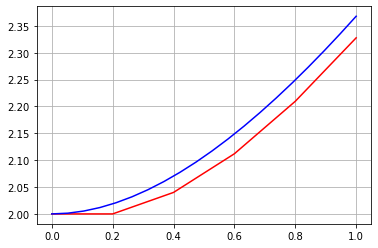

In [72]:
import numpy as np
import matplotlib.pyplot as plt

h = 0.20 #passo
x0 = 0.0
xn = 1.0

# criamos a lista com os pontos xi
X = np.arange(x0, xn+h, h) 
print ("pontos xi:", X)

# lista com y0, a ser preenchida pelos yi
Y = [2.0]                  

# entramos com f(x,y)
f = lambda x,y: x-y+2

# laço para ir calculando os yi e preenchendo a lista
for n in range(len(X)-1):
    Y.append(Y[n] + f(X[n],Y[n])*h ) #Y[-1] é o último yi calculado
    
# imprime
print ("pontos yi:", Y)
s = lambda x: np.exp(-x) + x + 1
Xe = np.linspace(x0,xn, 20)
Ye = s(Xe)


# plota
plt.plot(X, Y, "r-", Xe, Ye, "b-")
plt.grid()
plt.show()

## 1.6  Métodos de Série de Taylor

Consideremos o Problema de Valor Inicial (PVI) descrito por
$$\begin{cases} 
   y' = f(x,y) \\
   y(x_0)=y_0
  \end{cases}$$


Supondo que a solução $y(x)$ do PVI possui todas as derivadas contínuas no intervalo $[a,b]$ que contém os pontos de discretização $x_0$,$x_1$,...,$x_n$ , o desenvolvimento em série de Taylor da função $y(x)$ em torno do ponto $x_n$ é dado por

$$ y(x) = y(x_n) + y'(x_n)(x−x_n) + y''(x_n)\frac{(x-x_n)^2}{2!}+...+y^{(p)}(x_n)\frac{(x-x_n)^p}{p!}+y^{(p+1)}(\xi)\frac{(x-\xi)^{p+1}}{(p+1)!}$$

com $ x_0<\xi<x$. 

Tomando $x = x_n + h$, denotado por $x_n+1$ , assim, $h = x_n+1 − x_n$ e temos:

$$ y(x) = y(x_n) + y'(x_n)h + y''(x_n)\frac{h^2}{2!}+...+y^{(p)}(x_n)\frac{h^p}{p!}+y^{(p+1)}(\xi)\frac{(x-\xi)^{p+1}}{(p+1)!}$$

Se truncarmos a série de Taylor no p-ésimo termo, temos:

$$ y(x) = y(x_n) + y'(x_n)h + y''(x_n)\frac{h^2}{2!}+...+y^{(p)}(x_n)\frac{h^p}{p!}$$

com um **erro de truncamento** dado pelo último termo da série de Taylor

$$e(x_n)=y^{(p+1)}(\xi)\frac{(x-\xi)^{p+1}}{(p+1)!}$$


Se a função $y(x)$ possui a derivada de ordem $(p + 1)$ contínua no intervalo $[a,b]$, então existe $M = max \left\{ \left|y^{(p+1)}(x)\right|, x \in [a,b] \right\}$, e temos uma estimativa para o erro dada por um limitante superior, de ordem $(p + 1)$, como segue:

$$ |E| \leq \frac{h^{p+1}}{(p+1)!}M$$

Assim, usando a série de Taylor, podemos calcular aproximações para $y(x)$ da seguinte forma:

$$ y(x_{n+1}) = y_n + y'_nh + y''_n\frac{h^2}{2!}+...+y^{(p)}_n\frac{h^p}{p!}$$

onde 

$ y'_n = f(x_n, y_n)$

$ y''_n = f_x(x_n, y_n) + f_y(x_n, y_n)y'_n$

$y'''_n = f_{xx}(x_n, y_n) + 2f_{xy}(x_n, y_n)f(x_n, y_n) + f^2(x_n, y_n)f_{yy}(x_n, y_n) + f^2_y(x_n, y_n)f(x_n, y_n)$

$\vdots $


**Exemplo 11.10 (Método de Taylor de ordem $p=2$:** Use o método de Taylor de ordem 2 para integrar numericamente a equação:

$$ \begin {cases}
   \frac{dy}{dx} = x-y+2 \\
    y(0)=2
    \end{cases}$$

de $x = 0$ a $x = 1$ com $N = 5$ subintervalos. Compare os valores e plote o resultado considerando a solução exata $y(x)=e^x - x + 1$.

*Solução:*

Precisamos usar a fórmula de recorrência

$$ y_{n+1} = y_n + y'_nh + y''_n\frac{h^2}{2!} $$

em que

$$ y' = x - y + 2 $$

$$ y'' = 1-y' = 1-(x-y+2) = -x+y-1$$

então

$$ y_{n+1} = y_n + (x_n - y_n + 2)h + (-x_n+y_n-1) \frac{h^2}{2!} $$

Y 1 = 2.02
Y 2 = 2.0724
Y 3 = 2.1513679999999997
Y 4 = 2.2521217599999996
Y 5 = 2.3707398431999995
[0.  0.2 0.4 0.6 0.8 1. ]
Sol. aprox.: [2.     2.02   2.0724 2.1514 2.2521 2.3707]
Sol. exata.: [2.     2.0187 2.0703 2.1488 2.2493 2.3679]


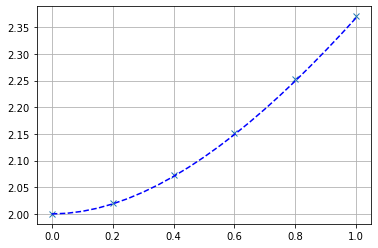

In [73]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x,y: x-y+2
df = lambda x,y: -x+y-1

x0 = 0
xn = 1
n = 5 #subintervalos

X = np.linspace(x0,xn,n+1)
Y = np.zeros(n+1)
Y[0] = 2
h=(xn-x0)/n
for i in range(n):
    Y[i+1] = Y[i] + h*f(X[i],Y[i]) + 0.5*(h**2)*df(X[i],Y[i])
    print ("Y",i+1,"=",Y[i+1])
print (X)
print ('Sol. aprox.:',np.round(Y,4))
print ('Sol. exata.:',np.round(np.exp(-X) + X + 1, 4))

Xe = np.linspace(X[0],X[-1],21)
Ye = np.exp(-Xe) + Xe + 1


# plotando
plt.plot(X, Y, "x",Xe, Ye, 'b--')
plt.grid()
plt.show()

## 11.7 Métodos de Runge-Kutta 

O método de Runge-Kutta mais simples é o de ordem 1. Neste caso, o método coincide com o método de Euler, isto é, o método de Taylor de ordem 1, apresentado na seção 11.5. 

Assim, considerando, novamente, o Problema de Valor Inicial (PVI) dado por

$$\begin{cases} 
   y' = f(x,y) \\
   y(x_0)=y_0
  \end{cases}$$

tem-se o Método de Runge-Kutta como é apresentado a seguir.


### Método de Runge-Kutta de ordem 1

O processo iterativo será dado por:

$$ y_{n+1} =y_n + hk_1 $$ 
com
$$ k_1 = f(x_n, y_n)$$

(Ver exempos de seção 8.2).

### Método de Runge-Kutta de ordem 2

O processo iterativo será dado por:

$$ y_{n+1} =y_n + \frac{h}{2}(k_1+k_2) $$ 

com
$$ k_1 = f(x_n, y_n)$$

$$ k_2 = f(x_n+h, y_n+hk_1) $$


o qual também é conhecido como **método de Euler aperfeiçoado**.

A figura abaixo ilustra uma  interpretação gráfica do método.

<img src="https://github.com/tiagoburiol/NUMETHODS/raw/master/8_SOLUCAO_NUMERICA_DE_EDOs/imagens/runge_kutta_ordem_2.png" width="600">

**Exemplo 1.11:** Usando o método de Euler aperfeiçoado, calcule a solução do PVI definido por:

$$\begin{cases} 
   y' = f(x,y)=x-y+2 \\
   y(x_0)= y(0) = 2
  \end{cases}$$

com $x \in [a,b] = [0,1]$ e $N = 5$. 

A solução exata é $y(x) = e^{-x}+x+1$.

[0.  0.2 0.4 0.6 0.8 1. ]
[2.0, 2.02, 2.0724, 2.151368, 2.25212176, 2.3707398432]
[2.         2.01873075 2.07032005 2.14881164 2.24932896 2.36787944]


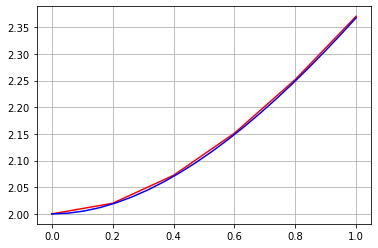

In [57]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x,y: x-y+2
x0 = 0.0
y0 = 2.0
N = 5

a = 0.0
b = 1.0
X = np.linspace(a,b,N+1)
print (X)
Y = [y0]

h = (b-a)/N

for n in range(len(X)-1):
    k1 = f(X[n], Y[n])
    k2 = f(X[n]+h, Y[n]+h*k1)
    Y.append(Y[n]+0.5*h*(k1+k2))
print (Y)  

s = lambda x: np.exp(-x) + x + 1
Xe = np.linspace(a,b, 20)
Ye = s(Xe)
print (s(X))

# plota
plt.plot(X, Y, "r-", Xe, Ye, "b-")
plt.grid()
plt.show()

**Exemplo 1.12:** Usando o método de Euler modificado, calcule a solução do PVI definido por:

$$\begin{cases} 
   y' = f(x,y)=x-y+2 \\
   y(x_0)= y(0) = 2
  \end{cases}$$

com $x \in [a,b] = [0,1]$ e $h=0.2$. 

A solução exata é $y(x) = e^{-x}+x+1$.

[0.  0.2 0.4 0.6 0.8 1. ]
[2.     2.02   2.0724 2.1514 2.2521 2.3707]
[2.     2.0187 2.0703 2.1488 2.2493 2.3679]


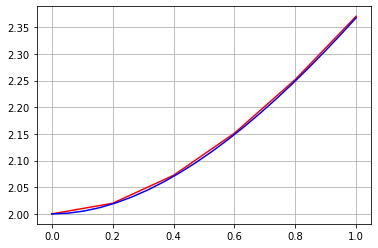

In [58]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x,y: x-y+2
x0 = 0.0
y0 = 2.0
N = 5

a = 0.0
b = 1.0
X = np.linspace(a,b,N+1)
print (X)
Y = [y0]

h = (b-a)/N

for n in range(len(X)-1):
    k1 = f(X[n], Y[n])
    Y.append(Y[n] + h * f(X[n]+0.5*h, Y[n]+0.5*h*k1))
    #print (k1,Y[-1])
print (np.round(Y,4))

s = lambda x: np.exp(-x) + x + 1
Xe = np.linspace(a,b, 20)
Ye = s(Xe)
print (np.round(s(X),4))

# plota
plt.plot(X, Y, "r-", Xe, Ye, "b-")
plt.grid()
plt.show()

### Método de Runge-Kutta de ordem 3

O método de Runge-Kutta ordem 3 é dado po

$$ y_{n+1} =y_n + \frac{h}{9}(2k_1 + 3k_2 + 4k_3) $$ 

com

$$ k_1 = f(x_n , y_n)$$

$$ k_2 = f(x_n + \frac{1}{2}h, y_n + \frac{1}{2}hk_1) $$

$$ k_3 = f(x_n + \frac{3}{4}h, y_n + \frac{3}{4}hk_2) $$

**Exemplo 1.13:** Usando o método de Runge-Kutta de ordem 3, calcule a solução do PVI definido por:

$$\begin{cases} 
   y' = f(x,y)=x-y+2 \\
   y(x_0)= y(0) = 2
  \end{cases}$$

com $x \in [a,b] = [0,1]$ e $h=0.2$. 

A solução exata é $y(x) = e^{-x}+x+1$.

[0.  0.2 0.4 0.6 0.8 1. ]
[2.     2.0187 2.0702 2.1487 2.2492 2.3677]


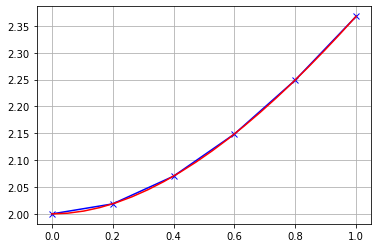

[0.  0.2 0.4 0.6 0.8 1. ]
[2.     2.0187 2.0702 2.1487 2.2492 2.3677]


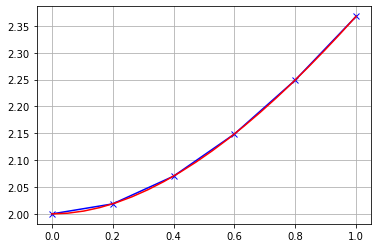

In [59]:

import numpy as np
import matplotlib.pyplot as plt

f = lambda x,y: x-y+2
x0 = 0.0
y0 = 2.0
N = 5

a = 0.0
b = 1.0
X = np.linspace(a,b,N+1)
print (X)
Y = [y0]

h = (b-a)/N
for n in range(len(X)-1):
    k1 = f(X[n], Y[n])
    k2 = f(X[n]+0.5*h, Y[n]+0.5*h*k1)
    k3 = f(X[n]+0.75*h, Y[n]+0.75*h*k2)
    Y.append(Y[n] + (h/9) * (2*k1 + 3*k2 + 4*k3))
    #print (k1,Y[-1])
print (np.round(Y,4))

# plota
plt.plot(X, Y, "xb-", Xe, Ye, "r-")
plt.grid()
plt.show()
import numpy as np
import matplotlib.pyplot as plt

f = lambda x,y: x-y+2
x0 = 0.0
y0 = 2.0
N = 5

a = 0.0
b = 1.0
X = np.linspace(a,b,N+1)
print (X)
Y = [y0]

h = (b-a)/N
for n in range(len(X)-1):
    k1 = f(X[n], Y[n])
    k2 = f(X[n]+0.5*h, Y[n]+0.5*h*k1)
    k3 = f(X[n]+0.75*h, Y[n]+0.75*h*k2)
    Y.append(Y[n] + (h/9) * (2*k1 + 3*k2 + 4*k3))
    #print (k1,Y[-1])
print (np.round(Y,4))

# plota
plt.plot(X, Y, "xb-", Xe, Ye, "r-")
plt.grid()
plt.show()

### Método de Runge-Kutta de ordem 4

O método de Runge-Kutta ordem 4 é dado po

$$ y_{n+1} =y_n + \frac{h}{6}(k_1 + 2k_2 + 2k_3 +k4) $$ 

com

$$ k_1 = f(x_n , y_n)$$

$$ k_2 = f(x_n + \frac{1}{2}h, y_n + \frac{1}{2}hk_1) $$

$$ k_3 = f(x_n + \frac{1}{2}h, y_n + \frac{1}{2}hk_2) $$

$$ k_4 = f(x_n + h, y_n + hk_3) $$

**Exemplo 1.14:** Usando o método de Runge-Kutta de ordem 4, calcule a solução do PVI definido por:

$$\begin{cases} 
   y' = f(x,y)=x-y+2 \\
   y(x_0)= y(0) = 2
  \end{cases}$$

com $x \in [a,b] = [0,1]$ e $h=0.2$. 

A solução exata é $y(x) = e^{-x}+x+1$.

[0.  0.2 0.4 0.6 0.8 1. ]
[2.     2.0187 2.0703 2.1488 2.2493 2.3679]


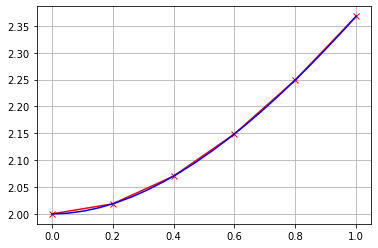

In [60]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x,y: x-y+2
x0 = 0.0
y0 = 2.0
N = 5

a = 0.0
b = 1.0
X = np.linspace(a,b,N+1)
print (X)
Y = [y0]

h = (b-a)/N
for n in range(len(X)-1):
    k1 = f(X[n], Y[n])
    k2 = f(X[n]+0.5*h, Y[n]+0.5*h*k1)
    k3 = f(X[n]+0.5*h, Y[n]+0.5*h*k2)
    
    k4 = f(X[n]+h, Y[n]+h*k3)
    Y.append(Y[n] + (h/6) * (k1 + 2*k2 + 2*k3 + k4))
    #print (k1,Y[-1])
print (np.round(Y,4))

# plota
plt.plot(X, Y, "xr-", Xe, Ye, "b-")
plt.grid()
plt.show()

Como já vimod, a biblioteca `scipy` implementa alguns algoritmos numéricos para soluções de PVIs em `solve_ivp`. Vamos usar para esse mesmo problema.

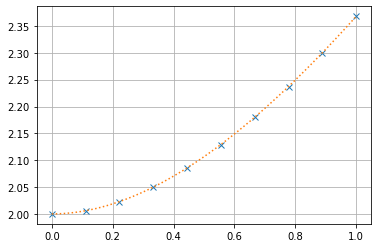

In [69]:
f = lambda x,y: x-y+2
sol = solve_ivp(f, [0, 1], [2],
                method="RK45", #Runge-Kutta method of order 5(4)
                t_eval = np.linspace(0,1,10))
plt.plot(sol.t, sol.y[0], 'x')


sol_ex = lambda x: np.exp(-x) + x + 1
te = np.linspace(0.0,1.0)
plt.plot(te,sol_ex(te),':')
plt.grid()
plt.show()

**Referências**

BOYCE, William E. Equações Diferenciais Elementares e Problemas de Valores de Contorno. Grupo GEN, 2020. E-book. ISBN 9788521637134. Disponível em: https://integrada.minhabiblioteca.com.br/#/books/9788521637134/. Acesso em: 19 mar. 2023.

KONG, Qingkai; SIAUW, Timmy; BAYEN, Alexandre M. Python Programming and Numerical Methods: A Guide For Engineers And Scientists. ed 1, Academic Press, 2021. DOI: https://doi.org/10.1016/C2018-0-04165-1. Disponível em:
https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html. Acesso em: 23 mar. 2023


LANGTANGEN, Hans Pette. A Primer on Scientific Programming with Python. Texts in Computational Science and Engineering. Springer Berlin, Heidelberg, ed 5, 2016. DOI: https://doi.org/10.1007/978-3-662-49887-3. Acesso em: 21 mar. 2023.

LEBL, Jiří. Differential Equations for Engineers. Amazon KDP edition, 2022. ISBN-13: 978-1-70623-023-6. Disponível em 
https://www.jirka.org/diffyqs/html/intfactor_section.html. Acesso em: 21 mar. 2023.

LYNCH, Stephen. Dynamical Systems with Applications Using Python. Birkhauser, 2018. http://www.doc.mmu.ac.uk/STAFF/S.Lynch/DSAP_Jupyter_Notebook.html

MARTINS, Ricardo Miranda. Tutorial rápido de Python para Matemáticos. IME-Unicamp, 2022. Disponível em: http://www.ime.unicamp.br/~rmiranda/code/python/python.html#Equa%C3%A7%C3%B5es-lineares-de-primeira-e-segunda-ordens. Acesso em: 21 mar. 2023.

https://www.sympy.org/scipy-2017-codegen-tutorial/notebooks/20-ordinary-differential-equations.html
